In [44]:
import numpy as np
import matplotlib.pyplot as plt   #plt.imshow para mostar imagens na tela
import imageio                    # im.imread e im.imsave para carregar e salvar imagens em .png


In [45]:
# cores básicas 
red   = (255,0,0)
green = (0,255,0)
blue  = (0,0,255)
black = (0,0,0)
white = (255,255,255)


In [46]:
# alguns filtros de convolução 
blurFilter = np.array(
    [
        [0, 1, 2, 1, 0],
        [1, 2, 4, 2, 1],
        [2, 4, 8, 4, 2],
        [1, 2, 4, 2, 1],
        [0, 1, 2, 1, 0]
    ]
)

# Filtro detector de borda
borderFilter = np.array(
     [
        [ 0, -4,  0],
        [-4, 16, -4],
        [ 0, -4,  0]
    ]
)

Programa Principal

In [47]:
def main():
    # leitura dos parâmetros
    in_Name  = input('Nome do Arquivo de entrada (.pgn):')
    out_Name = input('Nome do Arquivo na Saída (.pgn):')
    threshold  = int(input('Limiar desejado (Número inteiro):'))

    # carrega a imagem de entrada
    in_imag = Image() # entrada
    in_imag.load(in_Name) # carregamento da entrada
    print('Imagem de Entrada:', in_Name)
    in_imag.show() # mostra a entrada

    # pré-processamento para segmentar as bordas
    print('Imagem na Escala Cinza')
    grayAux = in_imag.toGray() ################ FEITO ########
    gray = grayAux[0]

    # imagem Binarizada
    print('Imagem Binarizada')
    in_imag.binarize(threshold)

    # normaliza os pesos dos filtros 
    blurKernel = blurFilter/blurFilter.sum() # borramento
    #borramento elimina as bordas que são menos intensas
    blurred = gray.filtre(blurKernel) ###########   2 - FALTA FAZER   ########



    edges = blurred.segmentEdges(threshold) ######    3 - FALTA FAZER   #####
    print('Imagem das bordas Segmentadas: ')
    edges.show()


    #realce das bordas na imagem original
    painted = in_imag.paint(black, edges) ######   4 - FALTA FAZER   ###########
    print('Imagens com bordas realçadas')
    painted.show()

    # Salvar o resultado
    painted.saved(out_Name)
    print('A imagem realçada foi salva em', out_Name)
  

CLASSE IMAGEM

In [48]:
class Image:

    #--------------------------------------------------------------------------------------------------------------------
    
    def _init_(self, array = None): 
        #Construtor de um objeto Imagem, que recebe um array com o conteúdo da imagem.
        if array is not None:
            self.data = np.copy(array)
        else:
            self.data = None 

    def getpixel(self, lin, col): 
        # (self, inteiro, inteiro) >>> retorna o valor do pixel na posição (lin, col)
        return self.data[lin,col]

    def setpixel(self, lin, col, valor): 
        # (self, inteiro, inteiro) >>> atribui valor ao pixel na posição (lin, col)
        self.data[lin, col] = valor

    def load(self, file): 
        # (Str) >>> None; arquivo extensão .png
        self.data = imageio.imread(file)

    def saved(self, file):
         # (Str) >>> None; Aqui também será salvo em extensão .png
        imageio.imsave(file,self.data)

    #----------------------------------------------------------------------------------------------------------------------
    
    def show(self): 
        # (self) >>> None; Exibir imagem numa janela
        s = self.data.shape
        if len(s) == 2:
            #níveis de cinza
            plt.imshow(self.data, cmap = 'gray')
        else:
            #imagem colorida
            plt.imshow(self.data)
    
        plt.show()

    #--------------------------------------------------------------------------------------------------------------------    
    
    def toGray(self): 
        # (self) >>> Retorna uma imagem convertida para cinza. Para tanto é preciso carregar uma imagem colorida em .png
        
        """
        rgb_greyscale = np.zeros( (rgb.shape[0],rgb.shape[1]), dtype=np.uint8)
        for row in range(0, rgb.shape[0]):
            for col in range(0, rgb.shape[1]):
                rgb_greyscale[row][col] = int(0.2126 * rgb[row][col][0] + 0.7152 * rgb[row][col][1] + 0.0722 * rgb[row][col][2])
        return rgb_greyscale
        """

        rgb = self.data
        r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
        gray = (0.2126 * r) + (0.7152 * g) + (0.0722 * b)

        return [gray, plt.imshow(gray, cmap='gray')]

    #--------------------------------------------------------------------------------------------------------------------
    
    def binarize(self, threshold): 
        # (self, inteiro) >>> retorna uma imagem convertida para binário. 
        rgbBin = self.data
        for row in range(0, rgbBin.shape[0]):
            for col in range(0, rgbBin.shape[1]):
                if rgbBin[row][col] <= threshold:
                    rgbBin[row,col] = (0,0,0)
                else:
                    rgbBin[row,col] = (255,255,255)
                
        return [rgbBin, plt.imshow(rgbBin)]

    #----------------------------------------------------------------------------------------------------------------------
    
    #def filtre(self, filtro): 
        # (self, ndarray) >>> Imagem Cinza. Este Método retorna uma imagem da convolução de Self com o filtro.
        # Como os valores do filtro são reais, os valores da imagem resultado também serão reais.


    #----------------------------------------------------------------------------------------------------------------------    
    
    #def paint(self, color, mask): 
        # (self, cor, Imagem) >>> Imagem; Recebe uma imagem binária e pinta os pixels de self correspondentes aos pixels Trfue da mascara com a cor.
        # Obeservar  que a cor  deve ter o mesmo numero de bits da imagem em self.
    
    #----------------------------------------------------------------------------------------------------------------------
    
    #def segmentEdges(self, threshold): 
        """Assumir que self é uma imagem com níveis de cinza. 
        O método calcula as matrizes gradiente gH e gV
        utilizando os filtros Sh e Sv de Sobel, e retorna uma imagem 
        binária com as mesmas dimensões da imagem cinza self, 
        onde os valores True satisfazem:
        sqrt(gH*gH + gV*gV) > limiar.
        Pixels que não satisfazem a condições devem receber False.

        Importante: como o limiar é um número entre 0 e 255,
        antes de aplicar o limiar (comparar), a imagem correspondente ao 
        módulo do gradiente (sqrt(gH*gH + gV*gV)) deve ser normalizada para
        o intervalo 0 a 255."""
    #----------------------------------------------------------------------------------------------------------------------
        

$Execução$ $da$ $Main$

Imagem de Entrada: imagem.png


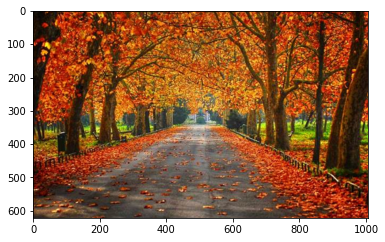

Imagem na Escala Cinza
Imagem Binarizada


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

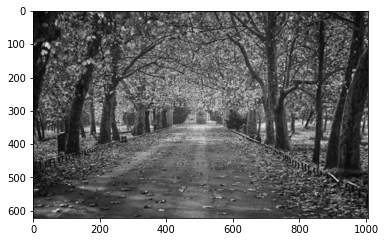

In [49]:
main()